## Corona Virus Project V.1.1

**This Version is the start of this project series about Corona Virus nowadays (i'am talking about this year 2020! a strange year!)**

**So, Here i'm trying to learn Data Science by doing this project on different sequential versions**

### Some Notes about this version:

* phase #1 project; Data Gathering & Data Visualizing
* type #1 data; Structured Data

---

> and here i'm also learning Markdown, Jupyter Notebooks, and Git. Amazing, right!

---

**I used the data provided by WHO website**
> From that link: https://covid19.who.int/ (time of extract was **Saturday, June 27, 2020, 10:43:10 AM**)  

> Especially that link: https://covid19.who.int/WHO-COVID-19-global-data.csv  

I think it's enough for the first version of this project that amount of data!!  

We are going to have more and more data on further analysis

**And Let's start cooking the data!**

### And I'm really sorry for my bad English! I'm still trying! :)

---

In [1]:
#Here i strat with importing the libraries that i will need through this notebook or this version

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

%matplotlib inline

os.chdir("D:\\Work\\Lab\\Fun_Area\\corona_virus\\V.1")

---

There was a problem here but i handled it with simple fixes but it needs more research further!  

I was in need to a package named "missingno" which was not included on the conda environment (Version 4.8.3) on my machine,  

Then i searched on google about the issue then i found this article from this link (https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/).  

and then i learned a new way to install packages that not included in the main conda environment by using the conda-forge project from this link (https://conda-forge.org/).  

and as simple as it is mentioned in the article, if you can't install a specific package that not exist in **conda** then you can check **conda-forge** and if you still can't find it there then you can use **pip** of (https://pypi.org/)  

conda --> conda-forge --> pip

and also any code that needs the shell to be executed you can use the exclamation mark "!" to run it from the jupyter notebooks like this:

> !conda config --add channels conda-forge  
> !conda config --set channel_priority strict  
> * actually those two lines of code were the solution to add the **conda-forge** project channels inside my conda environment and because of that (especially that issue) it needs further research so it will not make unwanted changes on the main default environment like i found the new channel of conda-forge was added directly on the top of the default channel and also the UI of Anaconda has been changed also. and that was because i was using the anaconda not in a seperate state from the system i'm running and that's a bad behaviour because i should use the anaconda on a seprated environment like virtual environment and that's different from using the Python from "virtualenv" without using conda at all or at least i should create a new user rather than adding the new channel on the root user directly!
Anyway that's the version #1 of this project, so we can fix that on the next version.
Do not forget i'm trying to learn Data Science by doing and that's a real fun, so mistakes are interesting and acceptable here. and for sure doing mistakes here are the real fun!
---

**to install missingno package through conda inside the jupyter**  

!conda install --yes --prefix {sys.prefix} missingno

In [2]:
import missingno

In [3]:
os.listdir()

['V.1.1.ipynb', 'WHO-COVID-19-global-data.csv']

In [4]:
corona = pd.read_csv('WHO-COVID-19-global-data.csv', parse_dates=["Date_reported"])

In [5]:
corona.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,1,1,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,1,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,1,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,1,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,1,0,0


In [6]:
corona.info()
#there is leading whitespaces in most of column names so we are going to remove them in the next cells!
#BTW this whitespaces you can't notice them in the display of corona.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24441 entries, 0 to 24440
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_reported       24441 non-null  datetime64[ns]
 1    Country_code       24191 non-null  object        
 2    Country            24441 non-null  object        
 3    WHO_region         24441 non-null  object        
 4    New_cases          24441 non-null  int64         
 5    Cumulative_cases   24441 non-null  int64         
 6    New_deaths         24441 non-null  int64         
 7    Cumulative_deaths  24441 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.5+ MB


In [7]:
# Here you can notice the whitespace that leads most of column names
print(corona.columns)

Index(['Date_reported', ' Country_code', ' Country', ' WHO_region',
       ' New_cases', ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths'],
      dtype='object')


In [8]:
# to remove leading and ending whitespace in column names if exists! so we protect ourselves from errors such as KeyError!
temp_column_names = []
for n in corona.columns:
    temp_column_names.append(n.strip())
corona.columns = temp_column_names
print(corona.columns)
#Now There is no whitespaces!

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')


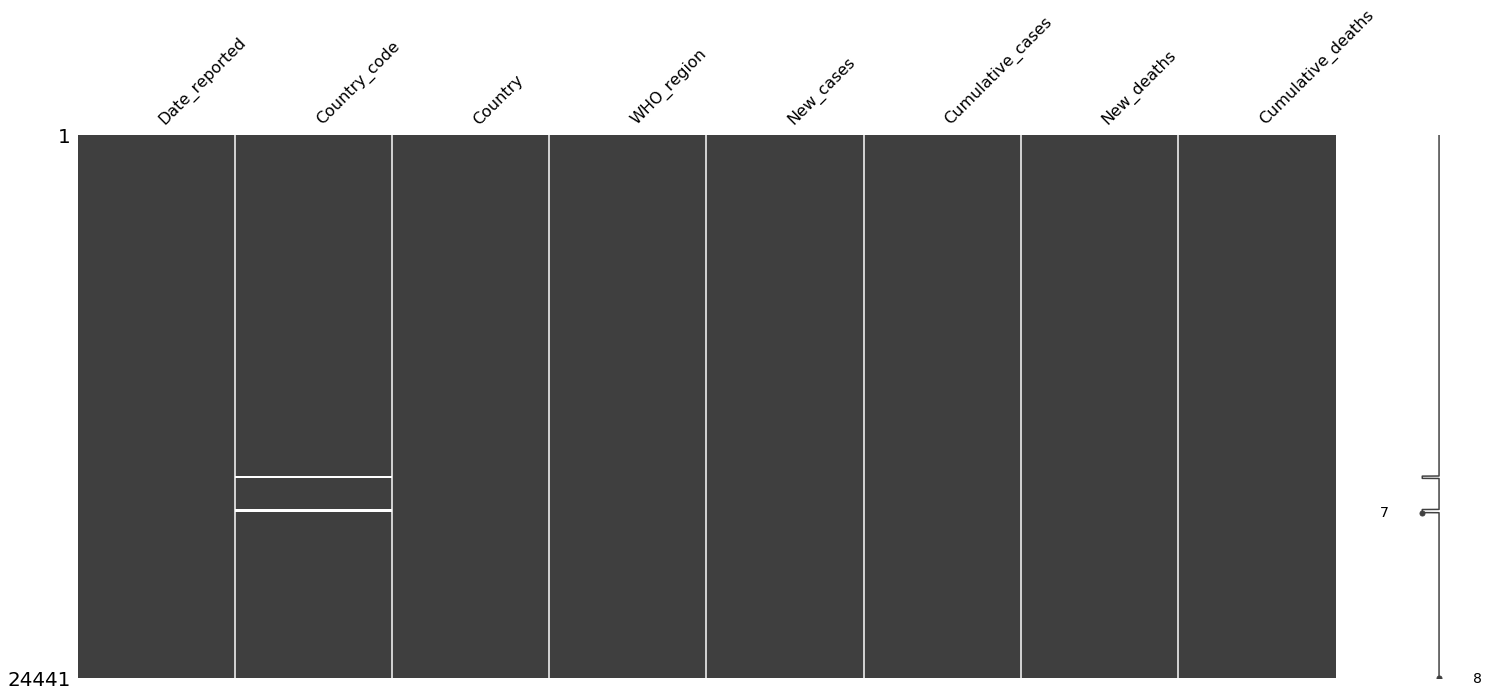

In [9]:
#I noticed there were null values in the Country_code variable so let's examine it here
missingno.matrix(corona)
#yes! this variable has missing values, let's examine more and compare the Country_code variable with Country variable

In [10]:
#let's filter corona datafrome based on the call of .isnull method on Country_code variable 
corona[corona['Country_code'].isnull()]

# the insight we got from this printout is the total number of missing values which is 250 record.
# but we can't be certain about the list of country names that have misssing values in the Country_code variable till now the printout is showing two records (Namibia, Other)
# but may be more there, let's see

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
15350,2020-03-14,NaN,Namibia,AFRO,2,2,0,0
15351,2020-03-15,NaN,Namibia,AFRO,0,2,0,0
15352,2020-03-16,NaN,Namibia,AFRO,0,2,0,0
15353,2020-03-17,NaN,Namibia,AFRO,0,2,0,0
15354,2020-03-18,NaN,Namibia,AFRO,0,2,0,0
...,...,...,...,...,...,...,...,...
16990,2020-06-23,NaN,Other,Other,0,741,0,13
16991,2020-06-24,NaN,Other,Other,0,741,0,13
16992,2020-06-25,NaN,Other,Other,0,741,0,13
16993,2020-06-26,NaN,Other,Other,0,741,0,13


In [11]:
# when we select the Country variable from the previous dataframe we can call the pandas Series method .unique() on the variable.
# Let's see the result

corona[corona['Country_code'].isnull()]['Country'].unique()

# Yes, now we are certain about the list of countries that have missing entries in the variable "Country_code"

array(['Namibia', 'Other'], dtype=object)

In [12]:
# First we need to check whether the country "Namibia" has a Country_code value in the main dataset or we will search for it on the web
# Second we are going to examine the Other entry in the Country variable the same as we do with the Namibia

print(corona[corona['Country'] == 'Namibia']['Country_code'].unique())
print(corona[corona['Country'] == 'Other']['Country_code'].unique())

# so we are certain now about all the records about (Namibia & Other) countries has no country codes in the main dataset
# We are going to write it ourselves, but why we need to do that if we can use the Country variable instead of this Country_code Variable
# Actually we will need that variable in further analysis in this project when we need to join this dataset with other datasets based on the abbreviations of the country names
# We have only one useful key now for this dataset which is Country_code so in this phase which is phase #1 (Data Gathering & Data Visualizaion) we clear the data and explore it
# for further manipulation and transformation so we can end up with a tidy and clean dataset to be used in the phase #2 (Data Analysis & Data Visualization)
# I.e building models and communicating results with you :)

# Anyway, We end up with this result nan value for both records (Namibia & Other) from the variable Country_code
# Google is my best friend all the time

[nan]
[nan]


In [13]:
# first we need to examine the list of abbreviations from this dataset
# Look, the postal abbreviations of country names of all the world are consisted of two characters, we need to be sure that's the case with this dataset or not! 
# i do not know how that happened actually i knew that ant numpy array could have one data type
# but in this case the numpy array (that we get from the call of .unique() method on the pandas series which is any variable on this dataset) has many values
# and that needs further research especially when the nan value placed inside the array which is making the confussion here
# so, to solve the problem, i explicitly converted all the values of the resulted array into str objects by calling the method .astype() with "str" on the array
# Here in this test we will get the value of any record that will not meet the criteria of Postal codes abbreviations for country names which is two characters
# so, we got just the nan value

for c in corona['Country_code'].unique().astype("str"):
    if len(c) != 2:
        print(c)
    else:
        continue

nan


In [14]:
# in this step we need to pass the values (NA, XX) as (Namibia, Other) abbreviation records in the variable Country_code
# maybe there is a simple way to do that in a pandas dataframe and maybe faster than this code but as we said before that's the first version of this project so no optimization here
for i in corona[(corona['Country_code'].isnull()) & (corona['Country'] == "Namibia")].index:
    corona.loc[i, "Country_code"] = "NA"
    
for i in corona[(corona['Country_code'].isnull()) & (corona['Country'] == "Other")].index:
    corona.loc[i, "Country_code"] = "XX"

In [15]:
# Now we have a complete dataset without null values, but let's check on that by calling the method .info() on the dataframe corona
corona.info()
# No null values here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24441 entries, 0 to 24440
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      24441 non-null  datetime64[ns]
 1   Country_code       24441 non-null  object        
 2   Country            24441 non-null  object        
 3   WHO_region         24441 non-null  object        
 4   New_cases          24441 non-null  int64         
 5   Cumulative_cases   24441 non-null  int64         
 6   New_deaths         24441 non-null  int64         
 7   Cumulative_deaths  24441 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.5+ MB


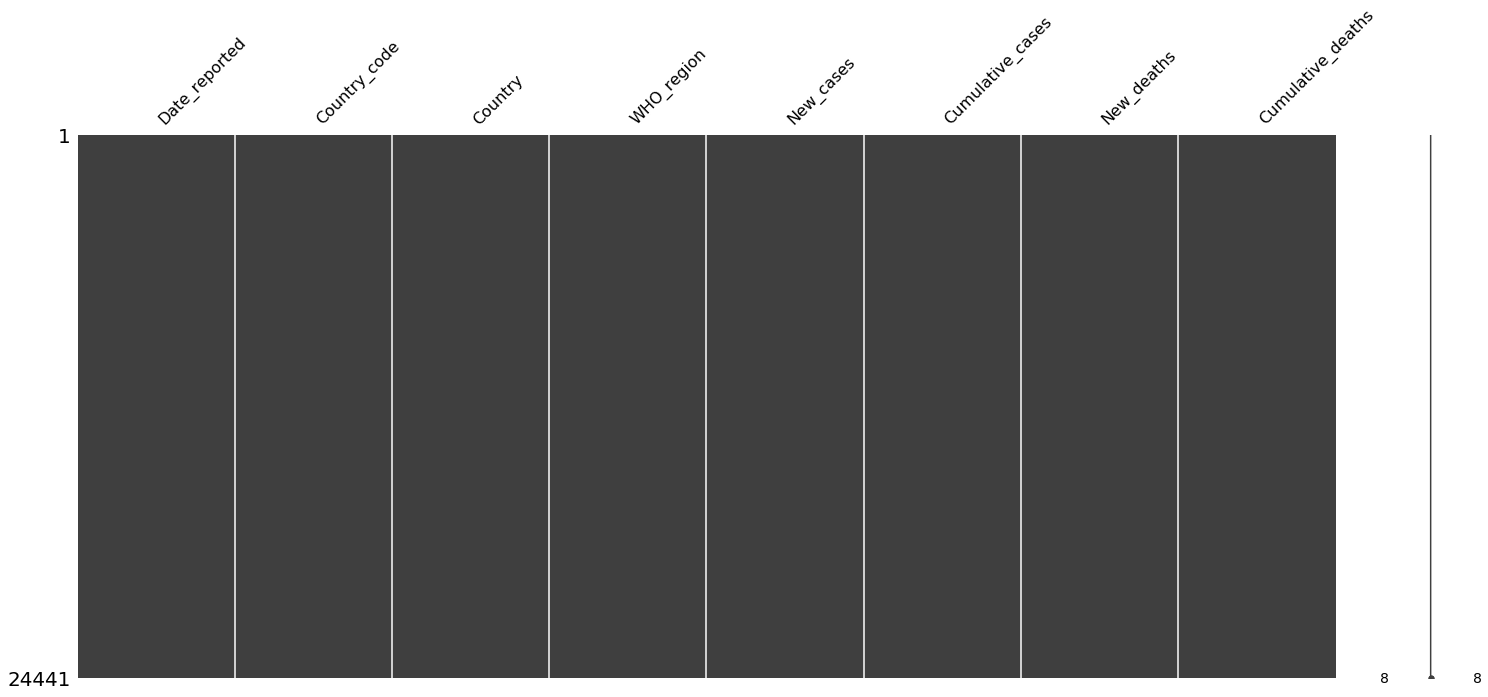

In [16]:
# Let's use the matrix graph from the missingno package to see that visually
missingno.matrix(corona)
# No gaps on our dataset now
# you can compare that graph with the first one to be sure!

---

**Let's check each variable or feature in some level of details**

---

In [17]:
# Here we can see that we got 169 days from the call of .describe() method on the Date_reported Variable
# But we can not depend on the value of top reporting day from the call of this method
# to check on that top day with the top frequency of reporting cases we need to do different calls on the datetime object

corona.Date_reported.describe()

count                   24441
unique                    169
top       2020-05-23 00:00:00
freq                      216
first     2020-01-11 00:00:00
last      2020-06-27 00:00:00
Name: Date_reported, dtype: object

In [18]:
# Here we got this insight about the total number of countries that reported corona virus during this period which is 215 country and the extra country is the XX abbreviation
# The XX abbreviation that we modified inside the dataframe to represent all the other countries or regions that reported corona under the value of Other in the Country variable
# but this value is weird because the total number of countries in the world is 195
# And that weird number will have its further analysis in the next versions of this project so we can doing accurate geospatial analysis in future!
# Bur for now as WHO tells us there is 215 countries in their dataset and an extra basket with the value of Other to have the other regions
# Another insight is the top country with top frequency of reporting corona virus cases on daily bases which is China with an abbreviation "CN"
# But we can not be certain about this insight from the call of .describe() method here, because that type of investigation needs another type of code or analysis

corona.Country_code.describe()

count     24441
unique      216
top          CN
freq        169
Name: Country_code, dtype: object

In [19]:
# The same insights and the same explansion as the previous variable whisch is Country_code
corona.Country.describe()

count     24441
unique      216
top       China
freq        169
Name: Country, dtype: object

In [20]:
# Here we got a different insight about the total number of regions that WHO recognizes that needs more research about how WHO group countries around the world
# Is it grouping the countries based on continents or based on something else! We gonna see!
# but the most obvious insight we can get from here which is the top reporting Region which is "EURO", Standing for Europe Region with a frequency value of 7261

corona.WHO_region.describe()

count     24441
unique        7
top        EURO
freq       7261
Name: WHO_region, dtype: object

In [21]:
# And to get some info about the WHO grouping of countries, I called .unique() method on the WHO_region variable 
print(corona.WHO_region.unique())

['EMRO' 'EURO' 'AFRO' 'AMRO' 'WPRO' 'SEARO' 'Other']


In [22]:
# Although the ingights that we get from here is so useful and describe a lot from our dataset but we cant depend on all the statistical values we got here
# and that because of the most important insight we got about that variable which is the possibilities of having negative values inside the variable
# and because of that we need at first know the main explanation of that, and it could be amazing actually to have this type of records inside the variable
# that could tell us something about the quality of reporting, or it could be a representaion of something else and if that thing will be with the "New_deaths" Variable
# It could tell us more and more about our data here! So in general that's amazing thing and it will be our area of fun with data through the different versions of this project
# but we can tell what the maximum value of reporting new cases which is 54771 (We gonna know more about this value and what country that reported that and so on)
# Just Be patient!
# Another insight we can get from here is this variable will need a lot of data transformation through the project so we can get useful insights from it.

corona.New_cases.describe()

count    24441.000000
mean       392.409885
std       2157.585385
min      -3525.000000
25%          0.000000
50%          5.000000
75%         77.000000
max      54771.000000
Name: New_cases, dtype: float64

In [23]:
# And just to check on the possibilities of having many negative values on this variable, i called the two lines of code
# We got 32 observation with negative value in the variable "New_cases"
# And the total sum of them is -12726 cases
# So it seems a real thing and not error with the variable "New_cases" that we examine here!

print("The Total Number of Negative Observation: " + str(corona[corona["New_cases"] < 0]["New_cases"].count()))
print("The Sum Amount of Negative Observation: " + str(corona[corona["New_cases"] < 0]["New_cases"].sum()))

The Total Number of Negative Observation: 32
The Sum Amount of Negative Observation: -12726


In [24]:
# We can not have any useful insight here by calling the .describe() method on "Cumulative_cases" variable
# the only thing here is the max value which is 2,407,590 cases that is the highest value with reported cases from some country!
# And by reading the news you can know that's USA
# So we can use that variable in a different manner in future, so we can get useful insights from it, but that will be done in further analysis! Not Now!

corona.Cumulative_cases.describe()

count    2.444100e+04
mean     1.690287e+04
std      9.999367e+04
min      1.000000e+00
25%      2.500000e+01
50%      3.330000e+02
75%      3.039000e+03
max      2.407590e+06
Name: Cumulative_cases, dtype: float64

In [25]:
# The same thing with the previous "New_cases" variable and the same insights
# Possibilities of having negative values are existing
# The Maximum number of death cases was 6409 case in one day! (We are going to know more about that number in further analysis)

corona.New_deaths.describe()

count    24441.000000
mean        20.028068
std        132.189009
min      -1918.000000
25%          0.000000
50%          0.000000
75%          2.000000
max       6409.000000
Name: New_deaths, dtype: float64

In [26]:
# Checking the possibilities of having negative values inside the variable "New_deaths"

print("The Total Number of Negative Observation: " + str(corona[corona["New_deaths"] < 0]["New_deaths"].count()))
print("The Sum Amount of Negative Observation: " + str(corona[corona["New_deaths"] < 0]["New_deaths"].sum()))

The Total Number of Negative Observation: 16
The Sum Amount of Negative Observation: -3554


In [27]:
# The same as we got before from the previous Cumulative_cases variable which is Nothing important here by calling the .describe() method on that variable
# but we can get the max value of cumulative reporting from some country at some date which is 124,161 cases and you can think of USA
# but that's weird because that number is different than the number on news about USA (We're gonna investigate that too!)
# A lot of etsimation here, that's not a data science!!!! but anyway we did not mention any thing about facts till now! :)

corona.Cumulative_deaths.describe()

count     24441.000000
mean       1022.088131
std        6221.567948
min           0.000000
25%           0.000000
50%           7.000000
75%          69.000000
max      124161.000000
Name: Cumulative_deaths, dtype: float64

---

**I think that's okay for that Version of the project**  
**The whole idea about that project is about making data science more fun for me instead of just studying courses from datacamp and doing just the projects & exercises they provide to me**  
**That vesrsion of the project has its phase #1 of doing data science (And that organizing thing, actually it's personal, i like to organize the flow of work this way)**  
> Phase #1: Data Gathering & Data Visualizing; it means data gathering, cleaning, reshaping, transforming, manipulating, and exploring by visuals  
> Phase #2: Data Analysis & Data Visualizing; it means data analysis, modeling, machine learning modeling, and communicating the results with visuals  
> Phase #3: Data Product; it means developing real solutions by using different programming languages so the loop will be closed from phase #1 to phase #3  

**And for sure this data it's so so tidy data from the source which is WHO you can find it from here https://covid19.who.int/**

**In future we can see so more complicated data rather than that tidy beautiful data, and it will have a lot of work cleaning, scrubbing and munging**

**We gonna use the structured, semi-structured, unstructured, traditional, and big data types through this ptroject**

**We are going to have a real fun here**

**The only not real fun fact here is the Corona Virus, Be Safe, and Survive**

**You Can Do It**

**And see you, Tomorrow!**

---